In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def apply_ema_filter(data, alpha):
    """
    Applies an Exponential Moving Average (EMA) filter to the data.
    Higher alpha values give more weight to recent data. (less smoothing)
    Lower alpha values give more weight to older data. (more smoothing)
    """
    if not (0 < alpha <= 1):
        raise ValueError("Alpha must be between 0 (exclusive) and 1 (inclusive).")
    ema_filtered = np.zeros_like(data)
    ema_filtered[0] = data[0]  # Initialize the first value
    for i in range(1, len(data)):
        ema_filtered[i] = alpha * data[i] + (1 - alpha) * ema_filtered[i-1]
    return ema_filtered

def calculate_derivative(data, dt):
    """
    Calculates the derivative of the data using finite differences.
    Returns the derivative and the corresponding time points.
    The derivative array will be one element shorter.
    """
    if dt <= 0:
        raise ValueError("dt (time interval) must be positive.")
    derivative = np.diff(data) / dt
    return derivative


In [20]:
def main():
    # --- Configuration ---
    filename = "run_data.csv"
    dt = 0.025  # Sampling interval in seconds (25 ms)
    
    # Alpha values to test for the EMA filter
    # alpha_values = np.array([0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.7, 0.9]) # test wide range of alpha values
    # alpha_values  = np.logspace(-1.3, -0.7, 6) # focus in on alpha between 0.05 and 0.20 based on previous results
    alpha_values = np.array([0.08, 0.09, 0.10, 0.11]) # focus in even more

    # --- Load Data ---
    raw_signal = pd.read_csv("run_data.csv")['run_data'].values
    if raw_signal is None:
        return

    num_points = len(raw_signal)
    time_axis = np.arange(num_points) * dt

    # --- Plot Original Data ---
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis, raw_signal, label="Original Noisy Signal", color='lightblue', linewidth=1.5)
    plt.title("Original Sensor Data")
    plt.xlabel("Time (s)")
    plt.ylabel("Distance (units)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Plot Filtered Data and Derivatives for Different Alphas ---
    # Determine subplot layout (e.g., 5 rows, 2 columns for 10 alphas)
    n_alphas = len(alpha_values)
    n_cols = 2
    n_rows = (n_alphas + n_cols - 1) // n_cols # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), sharex=True)
    axes = axes.flatten() # Flatten to easily iterate

    for i, alpha in enumerate(alpha_values):
        ax = axes[i]

        # Apply EMA filter
        filtered_signal = apply_ema_filter(raw_signal, alpha)
        
        # Calculate derivative of the filtered signal
        derivative_signal = calculate_derivative(filtered_signal, dt)
        
        # Time axis for the derivative (it's one point shorter)
        time_axis_derivative = time_axis[1:] 

        # Plot filtered signal
        ax.plot(time_axis, filtered_signal, label=f"Filtered (α={alpha:.2f})", color='coral', linewidth=1.5)
        
        # Plot derivative on a secondary y-axis if scales are very different, or same axis
        ax_twin = ax.twinx()
        ax_twin.plot(time_axis_derivative, derivative_signal, label=f"Derivative (α={alpha:.2f})", color='green', linestyle='--', linewidth=1.5)
        
        ax.set_title(f"EMA Filter (α = {alpha:.2f}) and its Derivative")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Filtered Distance (units)", color='coral')
        ax_twin.set_ylabel("Derivative (units/s)", color='green')
        
        # Combine legends from both y-axes
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax_twin.get_legend_handles_labels()
        ax_twin.legend(lines + lines2, labels + labels2, loc='upper right')
        
        ax.grid(True, linestyle='--', alpha=0.7)

    # Hide any unused subplots if n_alphas is not a multiple of n_cols
    for j in range(n_alphas, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
    fig.suptitle("EMA Filtered Signal and its Derivative for Various Alpha Values", fontsize=16, y=0.99)
    plt.show()


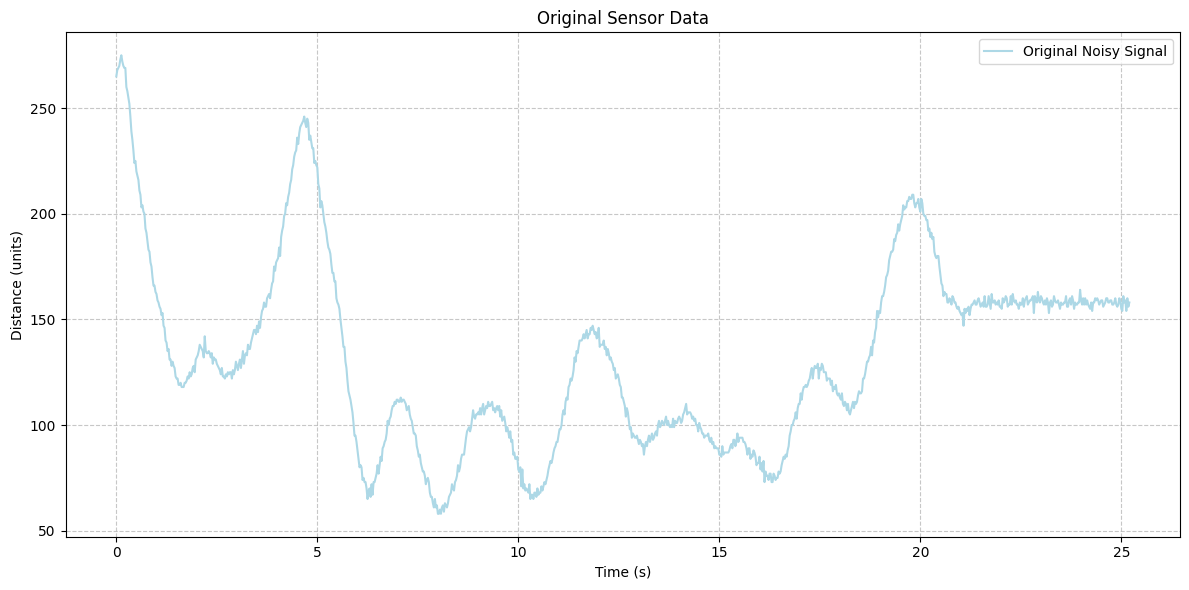

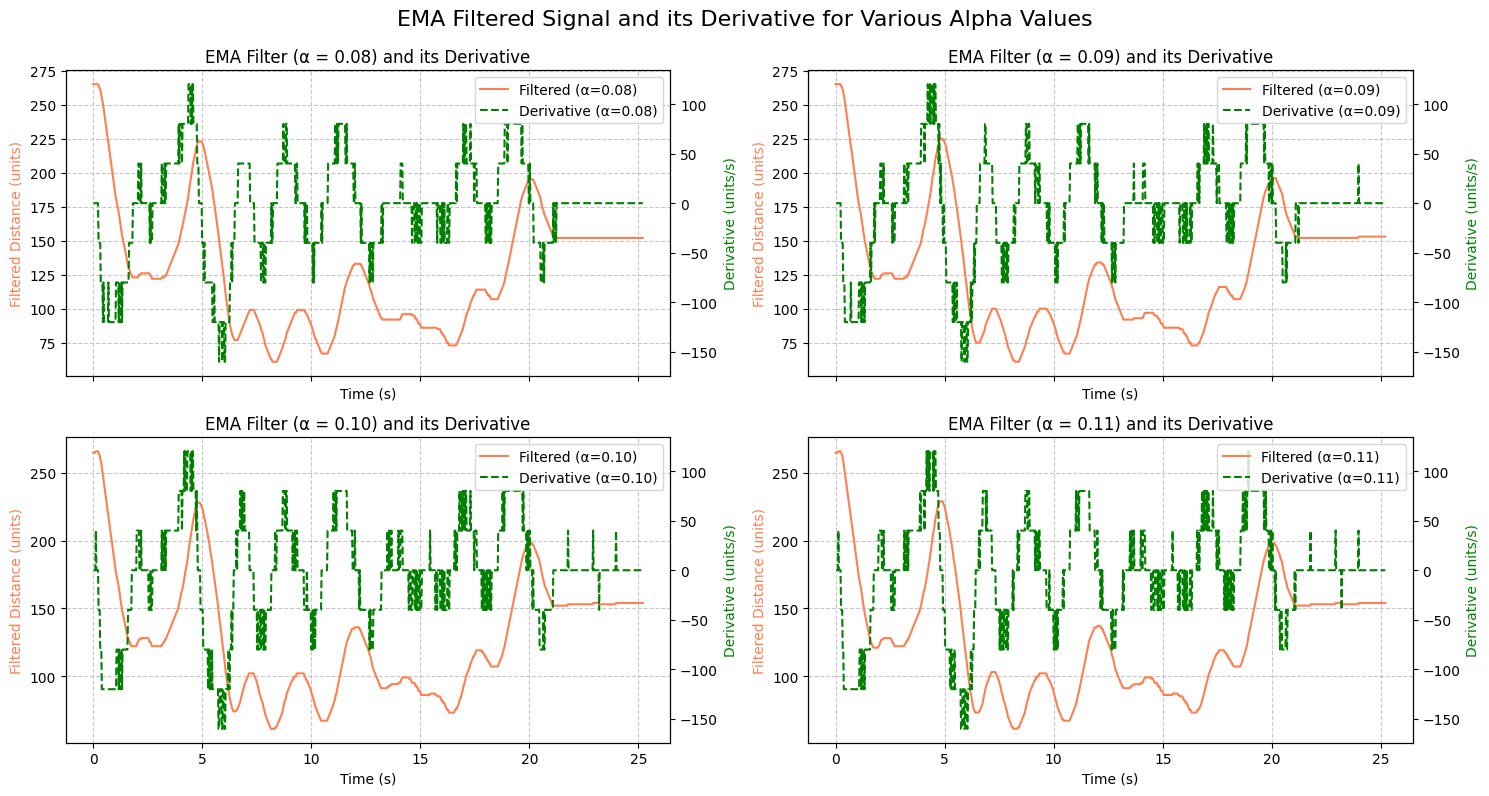

In [21]:
main()

In [ ]:
# conclusion: I like alpha = 0.09 the best. It seems to give a good balance between smoothing and responsiveness.